<a href="https://colab.research.google.com/github/dianakang/DIANA_Pandas/blob/master/Do_it_Pandas_4_%EA%B7%B8%EB%9E%98%ED%94%84_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차

*   4.1. 데이터 시각화가 필요한 이유
*   4.1.1. 앤스콤 4분할 그래프 살펴보기
*   4.1.2. 앤스콤 데이터 집합으로 그래프 만들기

---

*   4.2. matplotlib 라이브러리 사용하기
*   4.2.1. 기초 그래프 그리기
   *   (1) 히스토그램(Histogram)
   *   (2) 산점도 그래프(Scatter plot)
   *   (3) 박스 그래프(Box plot)
---

*   4.3. seaborn 라이브러리 사용하기
*   4.3.1. 단변량 그래프 그리기
   *   (1) 히스토그램 + 밀집도 그래프
   *   (2) 히스토그램
   *   (3) 밀집도 그래프
   *   (4) 히스토그램 + 밀집도 그래프 + 양탄자 그래프
   *   (5) count 그래프

---

*   4.3.2. 이변량 그래프 그리기
   *   (1) 산점도 그래프
   *   (2) 산점도 그래프 + 히스토그램
   *   (3) 육각 그래프 + 히스토그램
   *   (4) 밀집도 그래프
   *   (5) 바 그래프
   *   (6) 박스 그래프
   *   (7) 바이올린 그래프
   *   (8) 관계 그래프

---

*   4.3.3 다변량 그래프 그리기
   *   (1) 색상 추가하기
   *   (2) 크기와 모양 조절하기
   *   (3) 점을 다른 기호로 표현하기
   *   (4) 그래프 한 번에 그리기 - lmplot 메서드 이용
   *   (5) 그래프 한 번에 그리기 - FacetGrid 클래스 이용

---

*   4.4. 데이터프레임과 시리즈로 그래프 그리기
   *   (1) 히스토그램
   *   (2) 밀집도 그래프
   *   (3) 산점도 그래프
   *   (4) 육각 그래프
   *   (5) 박스 그래프

---

*   4.5. seaborn 라이브러리로 그래프 스타일 설정하기

---
---


# 4. 그래프 그리기

데이터의 숨겨진 패턴을 파악하기 위해 데이터 시각화를 하는 것은 중요하다. 

## 4.1. 데이터 시각화가 필요한 이유

### 4.1.1. 앤스콤 4분할 그래프 살펴보기

데이터 시각화를 보여주는 전형적인 사례로 앤스콤 4분할 그래프(Anscombe's quartet)가 있다. 

이 그래프는 영국의 프랭크 앤스콤(Frank Anscombe)이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프이다. 




---


앤스콤 데이터 집합은 seaborn 라이브러리에 포함되어 있다. 

seaborn 라이브러리의 load_dataset 메서드에 문자열 anscombe을 전달하면 앤스콤 데이터 집합을 불러올 수 있다. 



---



In [1]:
# 1. 앤스콤 데이터 집합 불러오기
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0


앤스콤 4분할 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며, 모든 데이터 그룹은 x,y 열을 가지고 있다. 

또한 이 4개의 데이터 그룹은 각각 평균, 분산과 같은 수치값이나 상관관계, 회귀선이 같다는 특징이 있다. 

그래서 이런 결과만 보고 **'데이터 그룹 I, II, III, IV의 데이터는 모두 같을 것이다'**라고 착각할 수 있다. 

바로 이것이 앤스콤이 지적한 '함정'이다. 

이제 시각화를 통해 앤스콤이 지적한 이 '함정'에 대해 알아보자!

---



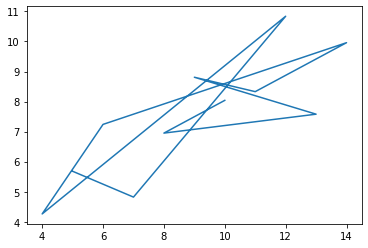

In [8]:
# 2. 선 그래프 그리기 
%matplotlib notebook
%matplotlib inline       
## %matplotlib inline은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 도와주는 코드

import matplotlib.pyplot as plt     ## matplotlib 라이브러리 불러오기

dataset_1 = anscombe[anscombe['dataset'] == 'I']   ## 첫 번째 데이터 그룹 추출

plt.plot(dataset_1['x'], dataset_1['y'])   ## plot 메서드로 선 그래프 그리기 -> plot 메서드에 x, y축 데이터를 전달하면 선 그래프가 나타남.

**plot 메서드는 기본적으로 선 그래프**를 그린다. 

**점으로 그래프**를 그리기 위해서는 **o를 세 번째 인자**로 전달하면 된다.


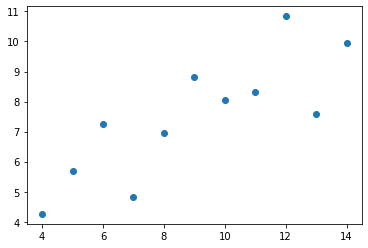

In [9]:
# 3. 점 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### 4.1.2. 앤스콤 데이터 집합으로 그래프 만들기

앤스콤 데이터 집합은 4개의 데이터 그룹으로 구성되어 있으며 각 데이터 그룹의 차이를 파악하려면 그래프로 시각화해야 한다.

이번에는 모든 데이터 그룹에 대한 그래프를 그려보자!





In [16]:
# 1. 데이터셋 불러오기
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

## dataset_1은 앞에서 추출했으므로 생략했다.

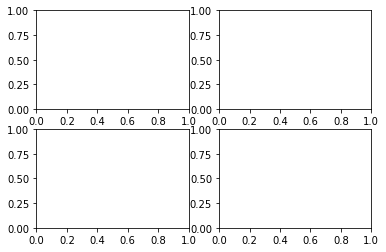

In [17]:
# 2. 기본 틀 만들기 -> figure 메서드 이용
fig = plt.figure()

# 3. 그래프 격자 만들기 ->  add_subplot 메서드 이용
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

**그래프의 기본 틀**을 만들기 위해서는 **figure** 메서드를 사용하고,

**그래프 격자**를 그리기 위해서는 **add_subplot 메서드**를 사용한다. 

add_subplot의 첫 번째 인자에는 그래프 기본 틀의 행 크기를, 두 번째 인자에는 열 크기를 지정한다.

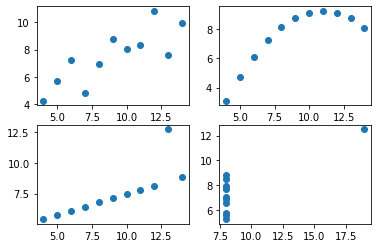

In [18]:
# 4. plot 메서드로 그래프 그리기
axes1.plot(dataset_1['x'], dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'],'o')
axes3.plot(dataset_3['x'], dataset_3['y'],'o')
axes4.plot(dataset_4['x'], dataset_4['y'],'o')

fig   ## 그래프 확인



*   그래프를 확인하려면 fig를 반드시 입력해야한다. 
*   점의 색상은 실행할 때마다 매번 다를 수 있다. 




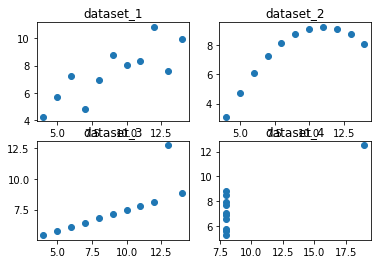

In [19]:
# 5. 각각의 그래프에 제목 추가 -> set_title 메서드 이용
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

**그래프 제목을 추가**하기 위해서는 **set_title 메서드**를 사용한다.

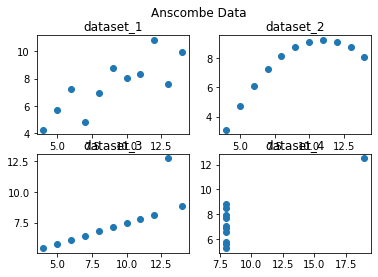

In [20]:
# 6. 기본 틀(fig)에 제목 추가 -> suptitle 메서드 이용
fig.suptitle("Anscombe Data")
fig

**기본 틀에 제목을 추가**하기 위해서는 **suptitle 메서드**를 사용한다. 

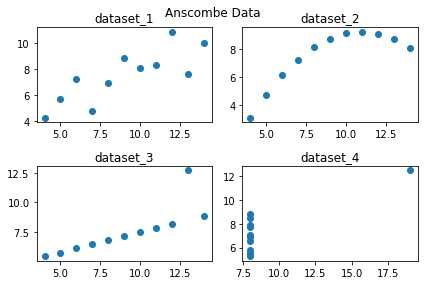

In [21]:
# 7. 그래프 레이아웃 조정하기 -> tight_layout 메서드 이용
fig.tight_layout()
fig

위의 5,6번 과정에서의 그래프를 보면, 각 그래프의 이름과 숫자가 겹쳐 보인다.

이런 경우에는 **tight_layout 메서드**를 호출하여 **각 그래프의 레이아웃을 조절**할 수 있다.



---


정리해보면, 앤스콤 4분할 그래프를 그리는 방법은 다음과 같다.



1.   데이터 셋 불러오기
2.   기본 틀 만들기 => **fig = plt.figure()**
3.   그래프 격자 만들기 => **axes = fig.add_subplot()**
4.   그래프 그리기 => **axes.plot()**
5.   그래프에 제목 추가 => **axes.set_title()**
6.   기본 틀 제목 추가 => **fig.suptitle()**
7.   그래프 레이아웃 조절 => **fig.tight_layout()**


---
-> 이제 우리는 앤스콤 4분할 그래프를 통해 평균, 분산, 상관관계, 회귀선의 통계 수치가 같아도 그래프의 형태는 다를 수 있다는 것을 알 수 있다!





## 4.2. matplotlib 라이브러리 사용하기

### 4.2.1. 기초 그래프 그리기

seaborn 라이브러리에는 tips라는 데이터 집합이 있다. 

tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님의 정보를 모아둔 것이다. 

이번 실습에서는 tips 데이터 집합을 사용해 다양한 그래프를 그려보겠다. 

In [22]:
# 1. 데이터 불러오기
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


tips 데이터 집합을 불러와 변수 tips에 저장한다. 

tips 데이터프레임은 지불금액, 팁, 성별, 흡연유무, 요일, 시간, 전체 인원 정보를 담고 있다.

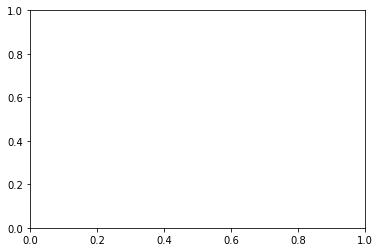

In [23]:
# 2. 기본 틀(fig)과 격자(axes) 생성
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

#### (1) 히스토그램 (Histogram)

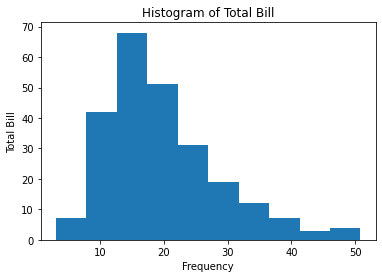

In [24]:
# 히스토그램 생성
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

**히스토그램**은 데이터프레임의 **열 데이터 분포와 빈도**를 살펴보는 용도로 자주 사용되는 그래프이다. 

이것은 *Total_Bill 변수 하나* 만을 사용하여 그린 **'일변량 그래프'**이다.


---

**hist 메서드**에 total_bill **열을 전달하면 히스토그램이 만들어진다.**

이때 **x축의 간격**은 **bins 인자값**으로 조정할 수 있다.



#### (2) 산점도 그래프 (scatter plot)

Text(0, 0.5, 'Tip')

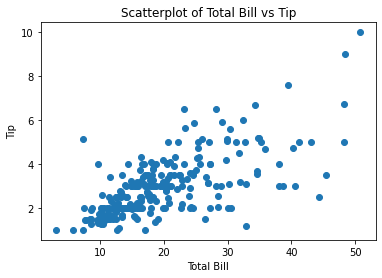

In [25]:
# 산점도 그래프 그리기
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

**산점도 그래프**는 변수 2개를 사용해서 만드는 **이변량 그래프**이다.

다음은 total_bill 열에 따른 tip 열의 분포를 나타낸 산점도 그래프이다. 


(따라서 변수는 *Total Bill과 Tip 두 개* 이다.)

#### (3) 박스 그래프 (box plot)

**박스 그래프**는 **이산형 변수와 연속형 변수를 함께** 사용하는 그래프이다. 

이산형 변수란 Female, Male과 같이 명확하게 구분되는 값을 의미하고, 

연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미한다.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Tips by SEX')

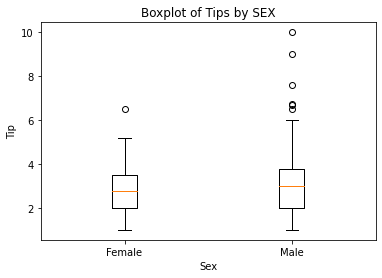

In [26]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
              labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by SEX')

여기서는 이산형 변수로 Sex를, 연속형 변수로 Tip을 사용한다.

boxplot 메서드의 첫 번째 인자로 tips 데이터프레임에서 성별이 Female인 데이터와 Male인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달한다. 

두 번째 인자에는 labels 인자값으로 성별을 구분하기 위한 이름을 추가한다.

### 4.2.2. 다변량 그래프 그리기

변수 3개 이상을 사용하여 만든 그래프를 '다변량 그래프'라고 한다. 

*   다변량 그래프가 필요한 이유

: 앞에서는 지불금액(total_bill)과 팁(tip)만을 사용하여 산점도 그래프를 그렸다.

만약 여기에 성별을 추가하여 산점도 그래프를 표현하려면 어떻게 해야 할까요?

점의 색상을 다르게 하면 된다. 만약 식사 비용을 추가한다면 점의 크기를 다르게 하는 방법으로도 산점도 그래프를 표현할 수 있다.

이렇게 3개 이상의 변수를 사용하는 다변량 그래프는 적재적소에 맞는 그래프 요소를 추가하여 그래프를 표현해야 한다. 

---

---


*   산점도 그래프


앞에서 실습한 산점도 그래프(scatter_plot)에 **성별을 새 변수로 추가**해보자. 

성별은 산점도 그래프에서 색상으로 구분하면 적당하다.

하지만 Female, Male과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없다.

**0,1과 같은 정수를 사용해야한다.**

**따라서 각 문자열을 정수로 치환하는 함수를 만들어야 한다.**

다음은 Female인 경우 0을 반환하고, Male인 경우 1을 반환하는 함수이다.

In [30]:
# 1. 각 문자열을 정수로 치환하는 함수 만들기
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

이제 recode_sex 메서드가 반환한 값(0,1)을 데이터프레임에 추가하면 된다.

데이터프레임에 sex_color **열을 새로 생성하여 추가**해보자.

이를 위해서는 sex 열에 recode_sex 함수를 브로드캐스팅하기 위해 **apply 메서드를 사용**한다.

In [31]:
# 2. sex_color 열 생성
tips['sex_color'] = tips['sex'].apply(recode_sex)

테이블당 인원 수(size)도 산점도 그래프에 추가해보았다. 이는 점의 크기로 표현하면 적당하다.

다음은 scatter 메서드에  s,c 인자값으로 테이블당 인원 수와 성별의 치환값을 전달한 것이다.

Text(0, 0.5, 'Tip')

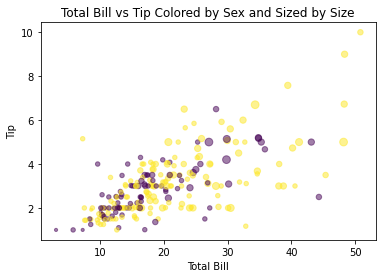

In [32]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1) ## 그래프 격자 만들기
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,   ## s는 점의 크기(size)
    c = tips['sex_color'],   ## c는 점의 색상(color)
    alpha = 0.5)             ## alpha를 0.5로 지정하여 투명도를 조절
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 4.3. seaborn 라이브러리 사용하기

seaborn 라이브러리를 활용하면 matplotlib보다 좀 더 화려한 그래프를 그릴 수 있다.

### 4.3.1. 단변량 그래프 그리기

In [33]:
# 데이터 불러오기
import seaborn as sns

tips = sns.load_dataset("tips")

**seaborn 라이브러리**로 **히스토그램**을 그리려면 **subplots, distplot 메서드**를 사용하면 된다.


먼저 subplots 메서드로 기본 틀을 만든 후, distplot 메서드에 total_bill 열 데이터를 전달하면 히스토그램을 그릴 수 있다. 

#### (1) 히스토그램 + 밀집도 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

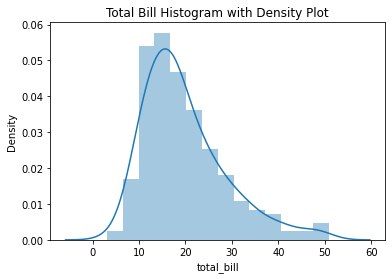

In [35]:
# 히스토그램 + 밀집도 그래프 생성 -> distplot 이용
ax = plt.subplots()  ## subplots 메서드 -> 기본 틀 생성
ax = sns.distplot(tips['total_bill'])   ## distplot 메서드에 열 데이터 전달 -> 히스토그램 생성
ax.set_title('Total Bill Histogram with Density Plot')

distplot 메서드를 사용하면 위의 그래프처럼 히스토그램과 밀집도 그래프가 함께 나온다.

만약 밀집도 그래프를 제외하고 **히스토그램만 나오게 하고싶다면 kde 인자값을 False**로 설정하면 된다.

#### (2) 히스토그램

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

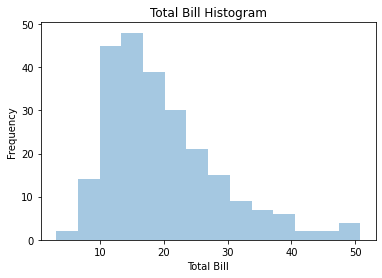

In [36]:
# 3.  인자값 설정하여 히스토그램만 생성 -> kde=False
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

#### (3) 밀집도 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

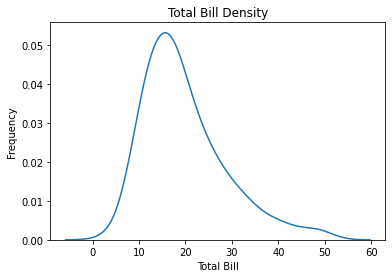

In [38]:
# 4.  인자값 설정하여 밀집도 그래프만 생성 -> hist=False
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

#### (4)  히스토그램 + 밀집도 그래프 + 양탄자 그래프

그러나 실무 환경에서는 데이터 시각화를 더 효율적으로 하기 위해 여러 그래프를 한 번에 출력하는 경우가 많다.

다음은 히스토그램과 밀집도를 그리는 distplot 메서드에 rug 인자를 추가하여 양탄자(rug)그래프까지 그린 것이다.

(**양탄자 그래프(rug)**는 그래프 축에 동일한 길이의 직선을 붙여 **데이터의 밀집 정도**를 표현한 그래프이다.)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

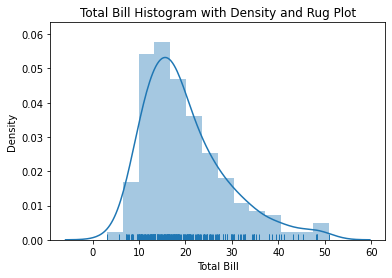

In [39]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)  ## rug : 양탄자그래프
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

#### (5) count 그래프

count 그래프는 이산값을 나타낸 그래프이다. 

다음은 countplot 메서드에 tips 데이터프레임의 day **열 데이터를 넣어 count 그래프를 그린 것**이다. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

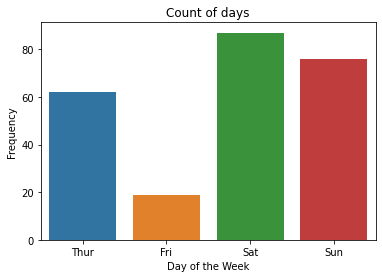

In [40]:
 ax = plt.subplots()
 ax = sns.countplot('day',data=tips)
 ax.set_title('Count of days')
 ax.set_xlabel('Day of the Week')
 ax.set_ylabel('Frequency')

### 4.3.2. 이변량 그래프 그리기

#### (1) 산점도 그래프

**산점도 그래프**를 그리려면 seaborn 라이브러리의 **regplot 메서드**를 사용해야 한다. 

regplot 메서드를 사용하면 *산점도 그래프와 회귀선을 함께*  그릴 수 있다.

만약 회귀선을 제거하려면 fig_reg 인자를 False로 지정하면 된다.

Text(0, 0.5, 'Tip')

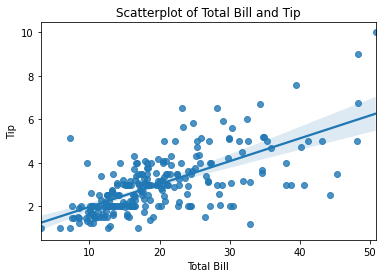

In [41]:
# 산점도 그래프 + 회귀선
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

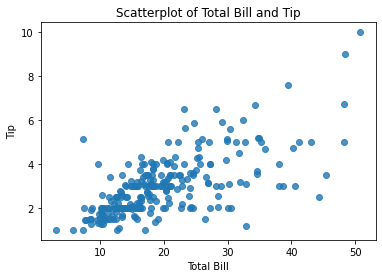

In [42]:
# 산점도 그래프
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### (2) 산점도 그래프 + 히스토그램

**산점도 그래프와 히스토그램을 한 번에 그리기 위해서는 jointplot 메서드를 사용**한다.

**x,y 인자에 원하는 열 이름을 지정**하고 **data 인자값으로 데이터프레임을 지정**하면 그래프를 그릴 수 있다.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

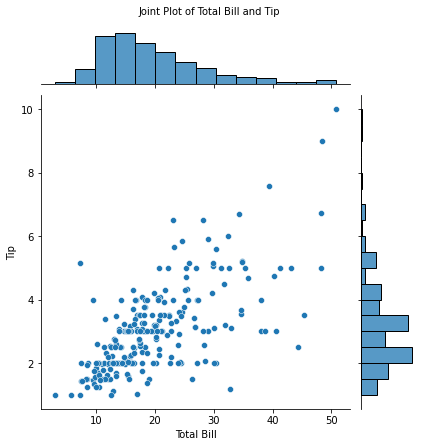

In [43]:
# 산점도 그래프 + 히스토그램
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### (3) 육각 그래프 + 히스토그램

산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다.

만약 산점도 그래프의 **데이터를 구분하기 쉽게 그리고 싶다면 육각 그래프(hexbin)**를 사용하면 된다.

육각 그래프는 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현된다.

**육각 그래프도** 마찬가지로 위에서 사용한 **jointplot 메서드**를 그대로 사용한다.

대신 kind **인자값을 hex로 지정**하면 된다.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

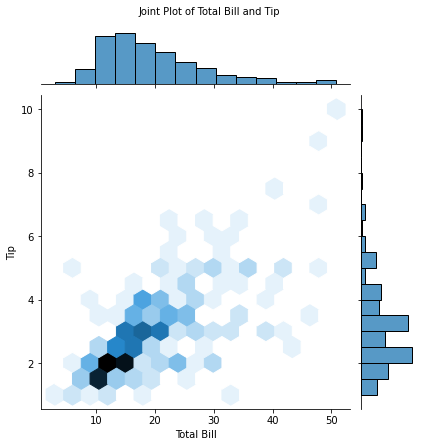

In [44]:
# 육각 그래프 + 히스토그램
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex")
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### (4) 밀집도 그래프

**이차원 밀집도**는 **kdeplot 메서드**로 만들 수 있다. 

다음은 total_bill, tip 열 데이터를 전달하여 이차원 밀집도를 그린 것이다.

이때 **shade 인자값을 True로 지정**하면 **그래프에 음영 효과**를 줄 수있다. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

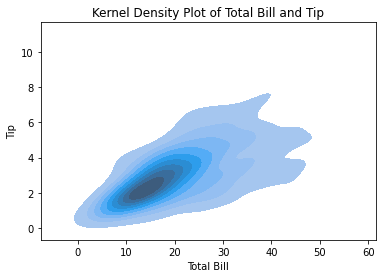

In [45]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### (5) 바 그래프

바 그래프는 지정한 변수의 평균을 계산하여 그릴 수 있다.

다음은 시간에 따라 지불한 비용의 평균을 바 그래프로 나타낸 것이다. 

Text(0, 0.5, 'Average total bill')

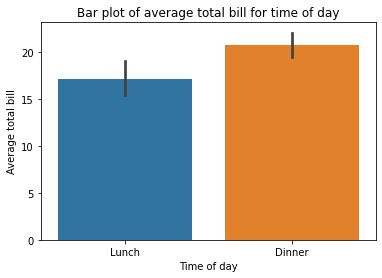

In [46]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

#### (6) 박스 그래프

박스 그래프는 최소값, 1분위수, 중간값, 3분위수, 최대값, 이상치 등 **다양한 통계량을 한 번에 표현**하는 그래프이다. 

Text(0, 0.5, 'Total Bill')

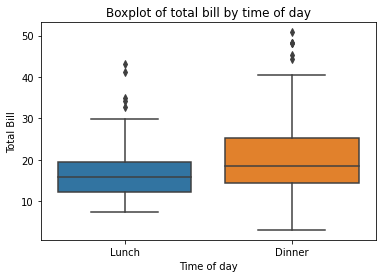

In [47]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### (7) 바이올린 그래프

박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만, 데이터 분산이 모호하게 표현된다.

이런 경우에는 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 된다.

쉽게 말해 박스 그래프의 박스 형태를 바이올린 형태로 바꾸면 바이올린 그래프가 된다. 

---

**바이올린 그래프**는 **violinplot 메서드**를 사용하여 그릴 수 있다.

Text(0, 0.5, 'Total Bill')

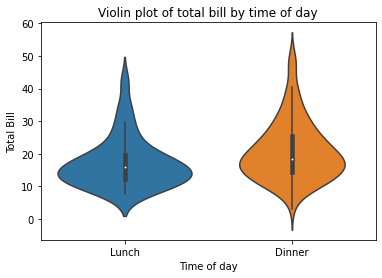

In [48]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### (8) 관계 그래프

마지막으로 관계 그래프를 그려보자. 관계 그래프는 지금까지 설명한 그래프를 **종합한 그래프**라고 생각하면 된다.

관계 그래프는 **pairplot 메서드에 데이터프레임을 넣는 방법**으로 간단하게 그릴 수 있다.

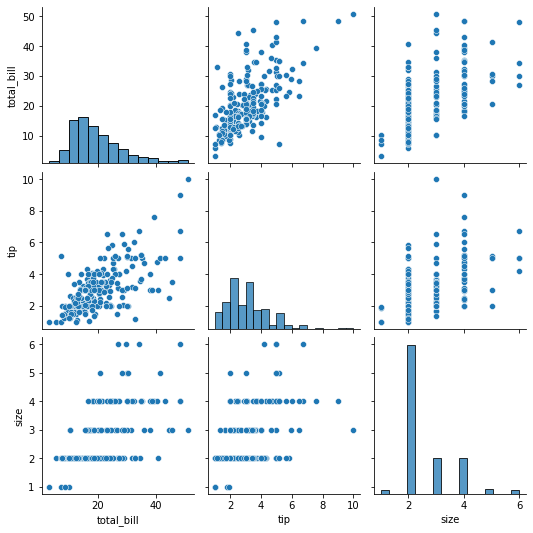

In [49]:
fig = sns.pairplot(tips)

이때 관계 그래프는 중복된 정보가 표현된다는 단점이 있다. 

즉, 관계 그래프의 절반(대각선을 기준으로 위)은 나머지 절반(대각선을 기준으로 아래)와 같다.

이러한 경우에는 중복된 그래프가 그려지는 위치를 지정하여 원하는 그래프로 교체하면 된다. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

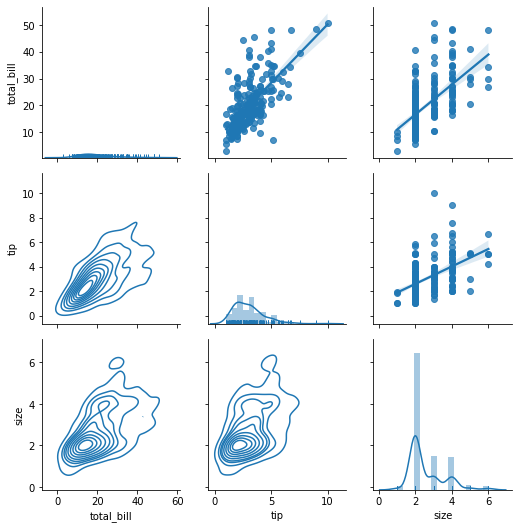

In [51]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)   ## 대각선 중심 위 - 산점도 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot)   ## 대각선 중심 아래 - 밀집도 그래프
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)  ## 대각선 중심 - 히스토그램 & 밀집도 그래프
plt.show()

map_upper 메서드는 대각선을 기준으로 위쪽에 그릴 그래프를 지정한다.

반대로 map_lower 메서드는 대각선을 기준으로 아래쪽에 그릴 그래프를 지정한다.

map_diag는 대각선을 중심으로 그래프를 그린다. 

위의 관계그래프는 이차원 밀집도를 대각선 기준으로 아래쪽에, 산점도 그래프는 대각선 기준으로 위쪽에 그린 것이다.

히스토그램과 밀집도는 대각선을 중심으로 그려진다.

### 4.3.3. 다변량 그래프 그리기

#### (1) 색상 추가하기

색상을 추가하는 방법은 아주 간단하다. 
plot메서드에 hue 인자값으로 색상에 사용할 열 이름을 추가하면 된다.

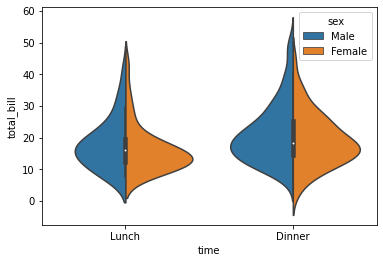

In [52]:
# 바이올린 그래프 색상 추가하기
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

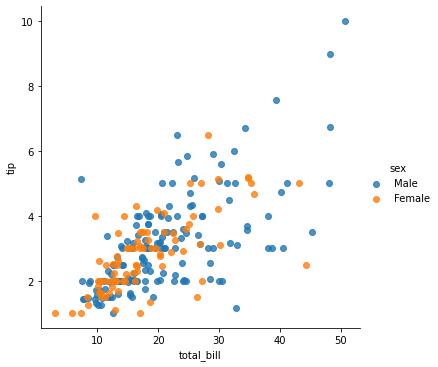

In [54]:
# 산점도 그래프 색상 추가하기
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)  ## 산점도 그래프가 lmplot이라는 점에 주목!! 

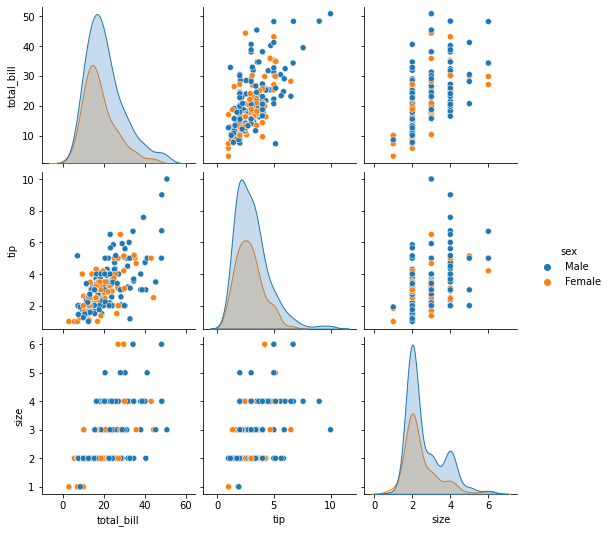

In [55]:
# 관계 그래프 색상 추가하기
fig = sns.pairplot(tips, hue='sex')

#### (2) 크기와 모양 조절하기

다음은 산점도 그래프의 점 크기를 조절하여 표현한 것이다.

산점도 그래프의 점 크기를 조절하려면 scatter_kws에 딕셔너리 형태로 인자값을 전달하면 된다.

여기서는 크기만 조절하기 위해 's'(size)를 다음과 같이 지정해준다.



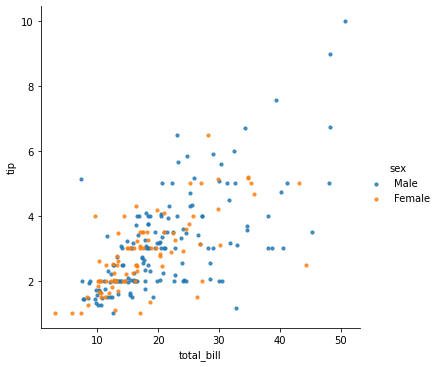

In [57]:
# 산점도 그래프 - 크기와 모양 조절하기
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     scatter_kws={'s':10})

!! 수정사항 !!

교재에는 scatter_kws={'s': tips['size']*10})라고 되어 있지만,

이를 실행해보면 다음과 같은 오류가 출력된다.

(ValueError: s must be a scalar, or the same size as x and y)

---

따라서, scatter_kws={'s': tips['size']*10})를 -> scatter_kws={'s':10}) 로 수정해야한다. 

아마도 scatter_kws={'s':　} 자체에 이미 사이즈 매개변수를 내포하고 있어서 그런거 같다.

#### (3) 점을 다른 기호로 표현하기

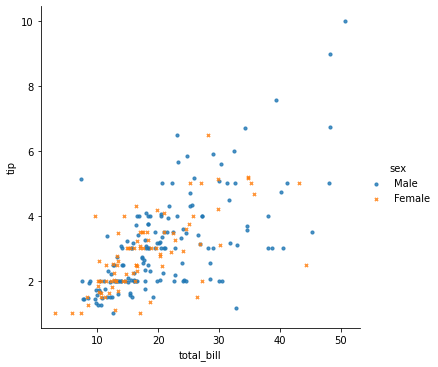

In [60]:
# 산점도 그래프 - 점을 다른 기호로 표현
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     markers=['o','x'], scatter_kws={'s': 10})

#### (4) 여러 데이터 그룹에 대한 그래프 한 번에 그리기 - lmplot 메서드 사용

다음은 앤스콤 4분할 그래프를 Implot 메서드로 그린 것이다.

x와 y인자에는 앤스콤 데이터 집합의 x,y 열을 전달하고 data 인자에는 데이터프레임(anscombe)을 전달했다.

그런데 그래프를 보면 4개의 데이터 그룹이 한꺼번에 산점도 그래프로 그려진 것을 알 수 있다. 

이를 그룹별로 그래프를 나누어 그리려면 어떻게 해야할까?

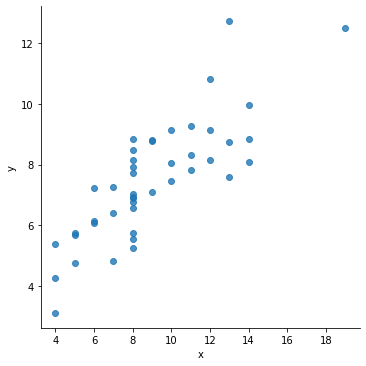

In [61]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기 -> 실패!
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)   ## fit_reg 인자는 회귀선의 유무를 지정하는 값이다.

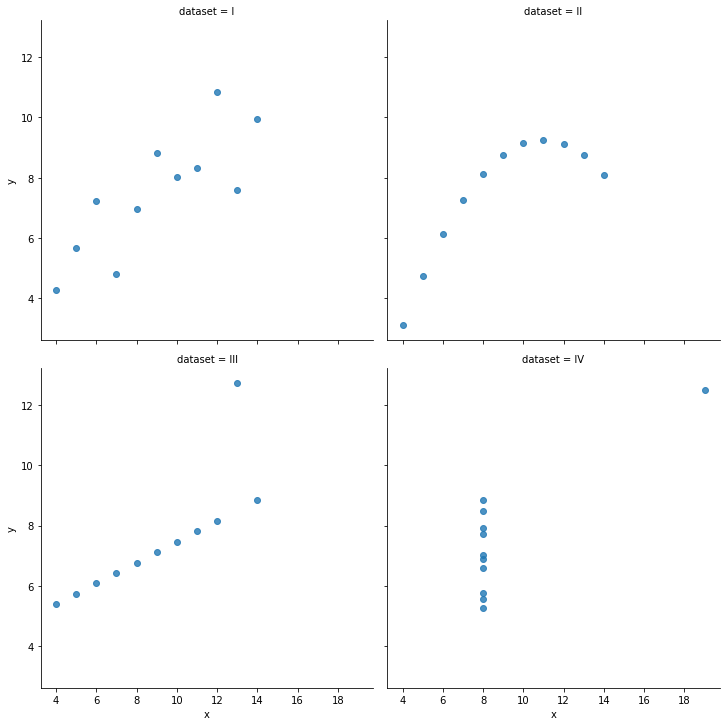

In [62]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기 -> 성공!
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=2)      ## col_wrap을 2로 설정

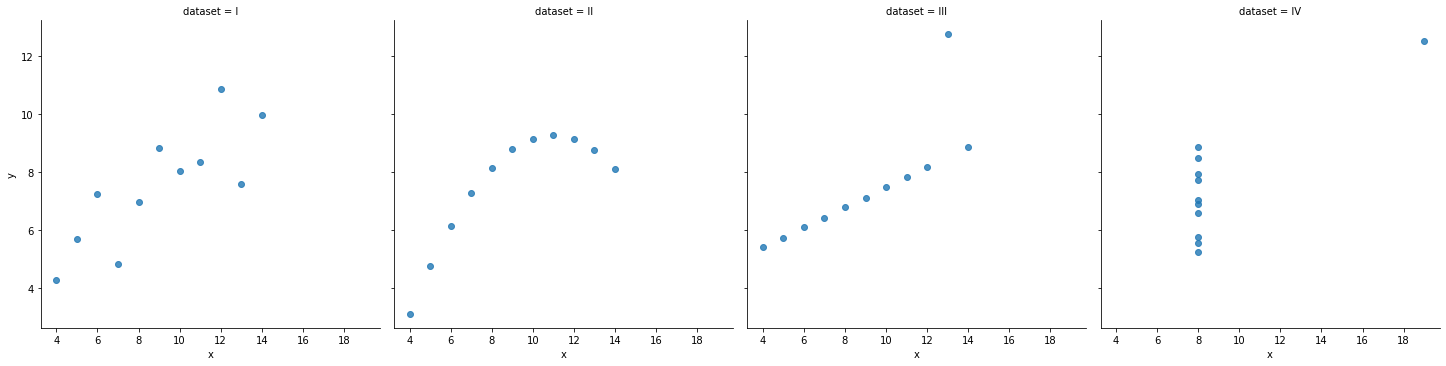

In [63]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기 
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=4)    ## col_wrap을 4로 설정

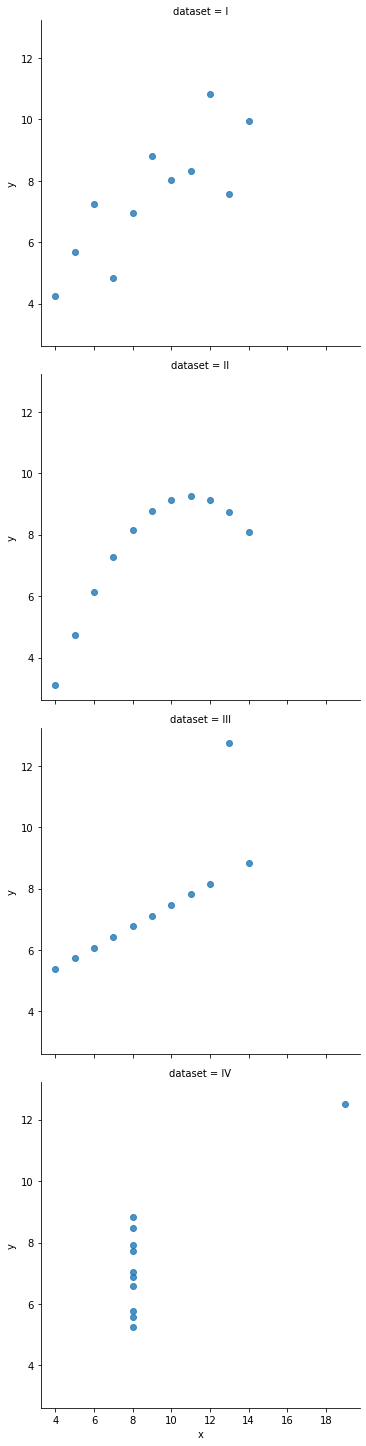

In [64]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기 
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=1)   ## col_wrap을 1로 설정

그룹별로 그래프를 나누어 그리려면 lmplot 메서드에 추가로 col, col_wrap 인자를 설정해야한다.

col_wrap 인자에는 그래프를 그릴 열의 최대값을 지정하고, col 인자에는 데이터 그룹을 구분할 열(dataset)을 지정한다.

#### (5) 여러 데이터 그룹에 대한 그래프 한 번에 그리기 - FacetGrid 클래스 사용

*   단변량 그래프 그리기

먼저 FaceGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체를 생성한다. 

그런 다음, 객체(facet)의 map 메서드에 그래프의 종류(distplot)와 x축으로 지정할 열 이름을 순서대로 전달하면 히스토그램, 밀집도, 양탄자 그래프를 그릴 수 있다. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

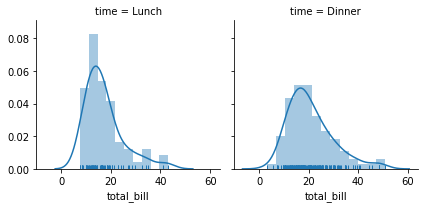

In [65]:
# 히스토그램 + 밀집도 그래프 + 양탄자 그래프 그리기 
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)   ## rug 인자는 양탄자 그래프의 유무를 지정하는 값



*   다변량 그래프 그리기

tips 데이터 집합의 day 열로 그룹을 구분하여 그래프를 그린다.



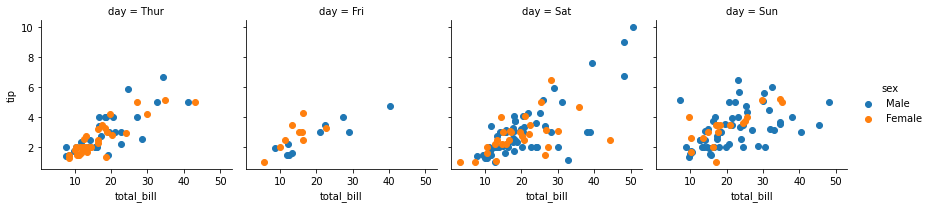

In [66]:
# 산점도 그래프 그리기
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')  ## 산점도 그래프를 그리기 위해 scatter를 첫 번째 인자에 전달했다.
facet = facet.add_legend()

이번에는 더 많은 변수를 사용하여 그래프를 그려보자.

다음은 time, smoker 열을 사용하여 산점도 그래프를 그린 것이다. 

time, smoker 열은 각각 2개의 값을 가지고 있다. (Dinner/Lunch, Yes/No)

col, row 인자값에 따라 smoker = Yes | time = Lunch와 같은 방법으로 그래프를 구분한다.

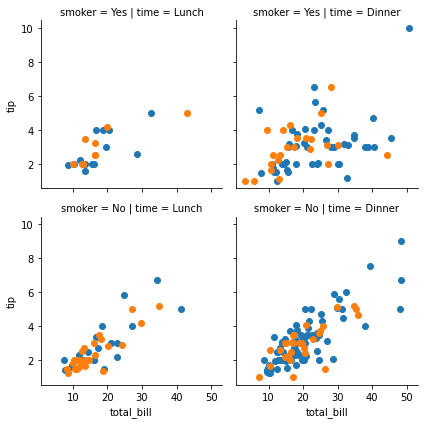

In [67]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

## 4.4. 데이터프레임과 시리즈로 그래프 그리기

간편하게 그래프를 그리고 싶은 경우에는 데이터프레임이나 시리즈를 사용하여 바로 그래프를 그릴 수 있다.

#### (1) 히스토그램

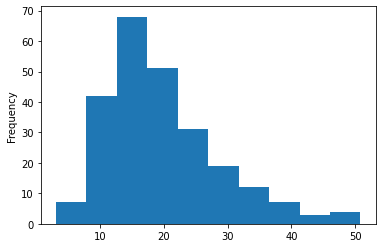

In [68]:
# 히스토그램 그리기
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

히스토그램을 그리기 위해서는 시리즈에 있는 **plot 속성에 정의된 hist 메서드를 사용하면 해당 시리즈의 값을 이용하여 히스토그램을 바로 그릴 수 있다.**

---

**투명도를 조절하려면 hist 메서드의 alpha, bins, ax 인자를 사용**하면 된다. 

다음은 tips 데이터프레임에서 2개의 시리즈를 선택하여 히스토그램을 그린 것이다.

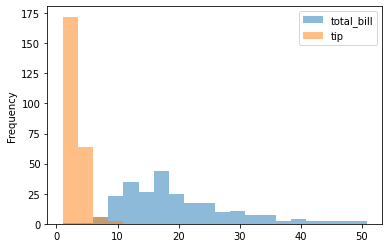

In [71]:
# 히스토그램 투명도 및 간격 조절
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)   ## alpha는 투명도, bins는 x축의 간격

밀집도, 산점도, 육각 그래프는 각각 kde, scatter, hexbin 메서드를 사용하여 그릴 수 있다.

#### (2) 밀집도 그래프

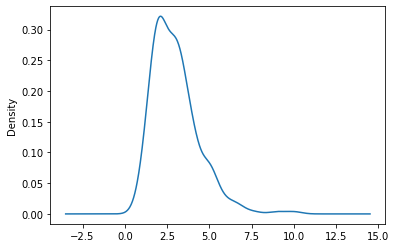

In [72]:
# 밀집도 그래프 그리기
ax = plt.subplots()
ax = tips['tip'].plot.kde()

#### (3) 산점도 그래프

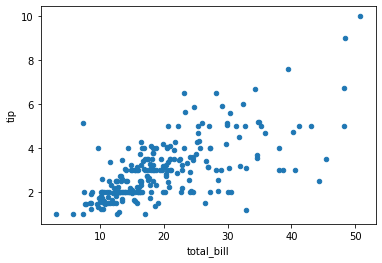

In [73]:
# 산점도 그래프 그리기
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

#### (4) 육각 그래프

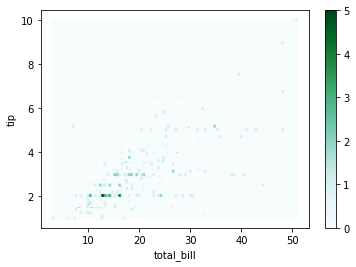

In [74]:
# 육각 그래프 그리기
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

이때 육각 그래프의 육각형 크기는 gridsize 인자를 사용하여 변경할 수 있다.

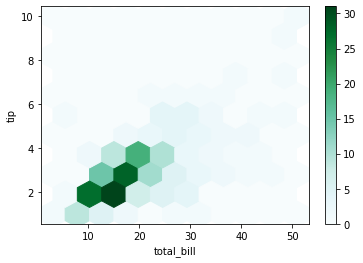

In [75]:
# 육각 그래프 - 육각형 크기 변경하기
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

#### (5) 박스 그래프

다음은 box 메서드를 사용하여 그린 박스 그래프이다.

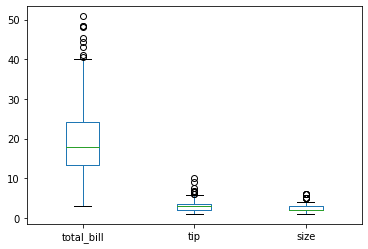

In [76]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

## 4.5. seaborn 라이브러리로 그래프 스타일 설정하기

지금까지 seaborn 라이브러리로 만든 그래프는 모두 기본 스타일이었다. 

seaborn 라이브러리로 만든 그래프의 스타일은 set_style 메서드를 사용하여 바꿀 수 있다.

set_style은 스타일을 적용할 부분에서 한 번만 실행하면 된다.

그렇게 하면 메서드를 실행한 이후의 그래프가 모두 지정한 스타일로 바뀐다.

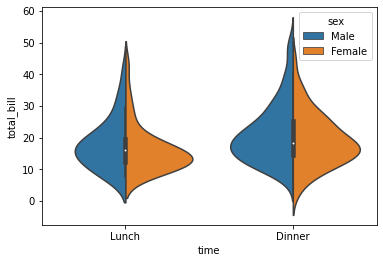

In [77]:
# 색상 추가된 바이올린 그래프
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

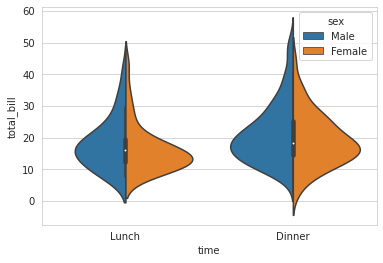

In [78]:
# 그래프 배경에 가로 줄 생성 <- whitegrid로 스타일 설정
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

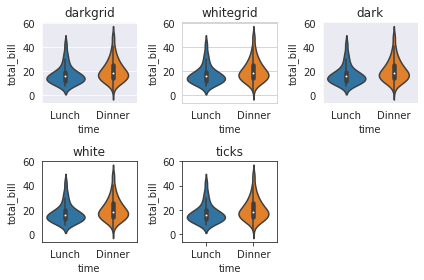

In [79]:
# for문 이용 모든 스타일 하나씩 적용하기
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position = idx + 1
  with sns.axes_style(style):
    ax = fig.add_subplot(2, 3, plot_position)
    violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
    violin.set_title(style)

fig.tight_layout()

이번 4장에서는 다양한 그래프를 그리는 방법에 대해 알아보았다. 

데이터 시각화는 데이터를 분석하기 위해 반드시 알아야하는 중요한 요소이므로, 기본을 잘 곱씹으며 잘 활용해보자!